<div class="markdown-google-sans">
  <h1>Project3</h1>
</div>

Leader: m5271043, Hiroshi Tatsuta

〈Member〉

m5271009, Shota Higa

m5271022, Yusuke Matsushima

m5271046, Yuki Tome

<div class="markdown-google-sans">
  <h1>アルゴリズム問題</h1>
</div>
問題文は「ガウシアンカーネルに基づく確率密度推定法について説明し、条件付き確率 , が与えられたときの最尤法について説明する。」というもの。

最尤法：与えられたデータを元に、最も確からしいパラメータの値を推定する手法のこと。すなわち起きた事象の中で一番確率として起きた値を推定する考え方。

条件付き確率：ある事象が起こった条件のもとで別の事象が起こる確率のこと。

ガウシアンカーネルに基づく確率密度推定法：

- カーネル密度推定とは?:

  与えられたデータから確率密度関数を推定する(非)パラメトリックな手法。非パラメトリックとは、あらかじめ確率密度関数の形状やパラメータを仮定せず、データから直接推定する手法を指す。ある分布の密度関数を推定したい場合は、パラメトリックモデル（正規分布、指数分布、ガンマ分布など）を想定した手法も使われる。
- ガウシアンカーネルとは？：

   カーネル密度推定には各標本点の影響度の広がり方を定義するカーネル関数を定義しなければならない。そのカーネル関数には正規分布（ガウス分布）や均等化などがある。正規分布とはデータが平均値付近に集まるような分布を示す。左右対称な曲線になる。

以上よりまとめると、<strong>ガウシアンカーネルに基づく確率密度推定法は、データセットの確率密度を滑らかに推定する手法として広く使用されており、ガウスカーネルを用いることで、データ点の周りの局所的なパターンや分布を捉えることができる。最尤法を用いることで、条件付き確率p(x | Ci):C₁、C₂、...、Cnの中から尤度を最大化するCiを見つける。</strong>ということである。

<div class="markdown-google-sans">
  <h1>Program Assignment:</h1>
</div>

  -  step1: Implement the Gaussian Kernel-based probability density estimation method given a group of data points.

In [12]:
pip install numpy

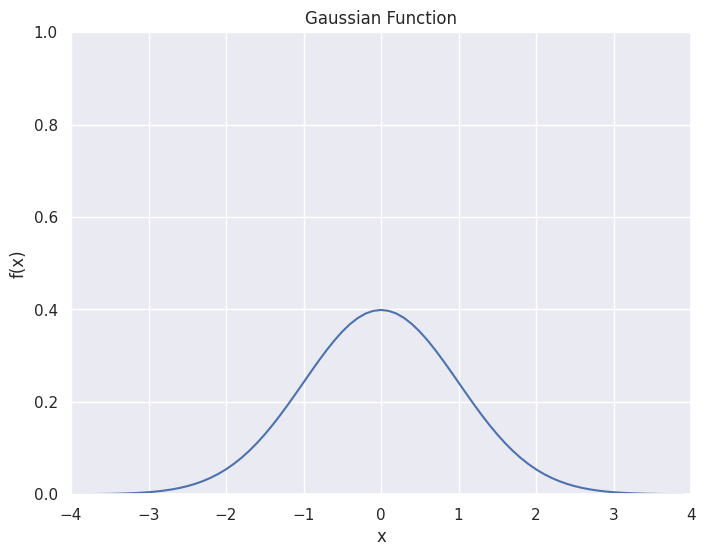

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# ガウス関数式は講義資料を参照 x:入力変数 mu:μ sigma:σ
def gaussian_function(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2*sigma**2))

#試しにA=1/√2π,σ＝１のとき、すなわち1/√2π * exp{-1μ^2/2}を計算（講義資料p21）
x = np.arange(-4, 4, 0.1)
mu = 0
sigma = 1
A = 1 / np.sqrt(2 * np.pi)  # A:1/√2π
y = gaussian_function(x, mu, sigma, A)
fig = plt.figure(figsize=(8.0, 6.0))  # 横幅を800ピクセル、高さを600ピクセル
ax = fig.add_subplot(111)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 1])
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gaussian Function')
plt.grid(True)
plt.show()

ガウシアンカーネルを用いて、統計データの密度の度合いを示すカーネル密度推定を実装。これをscipy.stats.gaussian_kdeを用いることで実装。

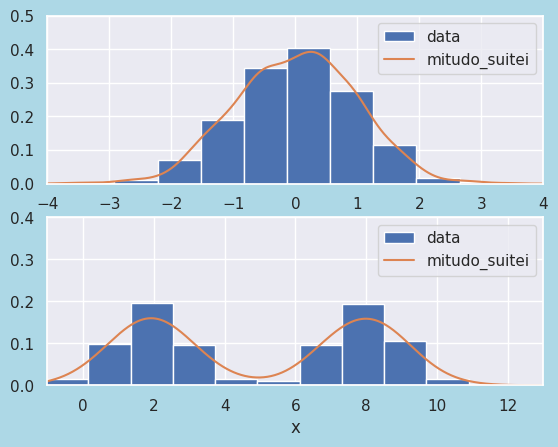

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, gaussian_kde
sns.set()
data = norm.rvs(loc=0, scale=1, size=1000)#平均0 標準偏差1からランダム100個
data_complicated_a = norm.rvs(loc=8, scale=1, size=500)#平均8、標準偏差1からランダム500個
data_complicated_b = norm.rvs(loc=2, scale=1, size=500)#平均2、標準偏差1からランダム500個
data_comp = np.concatenate([data_complicated_a, data_complicated_b])#上二つを合算させたとき。こぶが二つ出てくるとok
x = np.linspace(-5, 5, 1000)
x_comp = np.linspace(-2, 13, 1000)
mitudo_suitei = gaussian_kde(data)
mitudo_suitei_comp = gaussian_kde(data_comp)
# # カーネル密度推定
y = mitudo_suitei(x)
y_comp = mitudo_suitei_comp(x_comp)
fig= plt.figure( facecolor='lightblue')
#0を中心に広がる分布になってほしい
ax1 = fig.add_subplot(2, 1, 1)
ax1.hist(data, density=True, label='data')
ax1.plot(x, y, label='mitudo_suitei')
ax1.legend(loc = 1)
ax1.set_xlim(-4, 4)
ax1.set_ylim(0, 0.5)
ax1.set_xlabel('x')
#波打つ統計の分布
ax2 = fig.add_subplot(2, 1, 2)
ax2.hist(data_comp, density=True, label='data')
ax2.plot(x_comp, y_comp, label='mitudo_suitei')
ax2.legend(loc = 1)
ax2.set_xlim(-1, 13)
ax2.set_ylim(0, 0.4)
ax2.set_xlabel('x')
fig.show()

Step 2: Implement the maximum likelihood-based decision.

ステップ2：最尤法に基づく決定を実装する。


アルゴリズム：ガウシアン関数にデータx1,x2...xnを順に代入し代入して出てくる関数同士をさらに掛け算していき（尤度関数）、それのμとσについてそれぞれ微分した後、その関数=0となる連立方程式を解いてμ、σが求まる。

ここで途中の掛け算が複雑なので対数を取り、積の計算ではなく和の計算にする。これが対数尤度関数。そして総和したのちにμとσに対していい感じの数値を与えていき対数尤度関数が最大になるμσを見つける。この２変数は最適化手法で求めようと思う。今回は最急降下法を使いました。

In [15]:
import numpy as np
from scipy.optimize import minimize
data = np.array([1.2, 2.3, 0.7, -1.5, 0.1])#自作データ平均は0.56、標準偏差が√1.25...になるか確認
def Gausu_Log_likelihood(params):
    mu = params[0]# 結果論：平均=muになればok
    sigma = params[1]#σが標準偏差にあたればok
    n = len(data)
    log_likelihood = -n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2 ) * np.sum((data - mu)**2)
    return -(log_likelihood)
syoki_suiteiti = [0,1] #[平均　分散]
result = minimize(Gausu_Log_likelihood, syoki_suiteiti, method='BFGS')
print(result)
estimated_mean = result.x[0]
estimated_variance = result.x[1]
print("mu: ", estimated_mean)
print("sigma^2 :", estimated_variance)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.242049370739515
        x: [ 5.600e-01  1.258e+00]
      nit: 8
      jac: [-1.431e-06  1.192e-07]
 hess_inv: [[ 3.338e-01 -3.413e-03]
            [-3.413e-03  1.593e-01]]
     nfev: 30
     njev: 10
mu:  0.5599995116524479
sigma^2 : 1.2579348145376301


よって最尤法により予想通り平均は0.56、標準偏差が√1.25(分散は標準偏差の二乗)が求まった。

Step3: 今回はirisデータを花の種類ごとにランダムで30個ずつ抜き出し合計90個のデータを扱う。ガウシアンカーネルを用いて、統計データの密度の度合いを示すカーネル密度推定を3種それぞれについて行う。irsデータからランダムに20個データを取り出し、最尤法を用いてそのデータがどのラベルなのか推定する。この際、データの特徴の値と推定密度の波線との交点を比較し、推定密度が高いものをその値に対する予測ラベルとする。

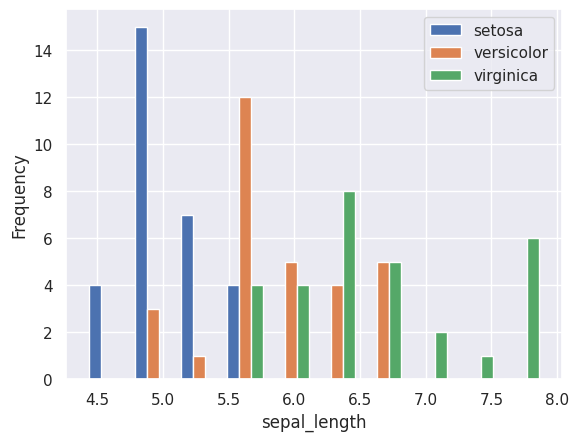

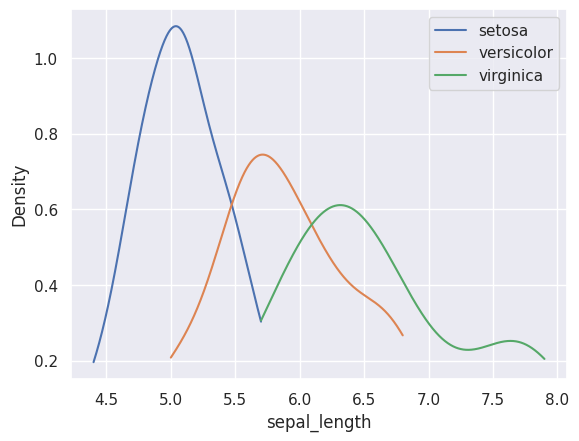

Randomly selected data:
Data: [5.1 3.5 1.4 0.3]
Actual label: setosa
Estimated label: setosa

Data: [4.7 3.2 1.6 0.2]
Actual label: setosa
Estimated label: setosa

Data: [7.4 2.8 6.1 1.9]
Actual label: virginica
Estimated label: virginica

Data: [7.7 3.  6.1 2.3]
Actual label: virginica
Estimated label: virginica

Data: [4.6 3.6 1.  0.2]
Actual label: setosa
Estimated label: setosa

Data: [7.7 2.8 6.7 2. ]
Actual label: virginica
Estimated label: virginica

Data: [5.5 2.4 3.7 1. ]
Actual label: versicolor
Estimated label: versicolor

Data: [4.3 3.  1.1 0.1]
Actual label: setosa
Estimated label: setosa

Data: [5.  2.3 3.3 1. ]
Actual label: versicolor
Estimated label: setosa

Data: [6.2 2.2 4.5 1.5]
Actual label: versicolor
Estimated label: virginica

Data: [5.6 3.  4.5 1.5]
Actual label: versicolor
Estimated label: versicolor

Data: [6.4 3.2 5.3 2.3]
Actual label: virginica
Estimated label: virginica

Data: [6.9 3.1 4.9 1.5]
Actual label: versicolor
Estimated label: virginica

Data: [6

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, gaussian_kde
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from scipy.optimize import minimize
import random
from sklearn.metrics import accuracy_score
sns.set()
iris = load_iris()
data = iris.data
target = iris.target
labels = iris.target_names

data, target = shuffle(data, target, random_state=42)
sample_size = 30
setosa_data = data[target == 0][:sample_size]
versicolor_data = data[target == 1][:sample_size]
virginica_data = data[target == 2][:sample_size]
#sepal_length
fig, ax = plt.subplots()
ax.hist([setosa_data[:, 0], versicolor_data[:, 0], virginica_data[:, 0]], bins=10, label=labels)
ax.set_xlabel('sepal_length')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

def kernel_density_estimation(data):
    x = np.linspace(data.min(), data.max(), 1000)
    kde = gaussian_kde(data)
    y = kde(x)
    return x, y
fig, ax = plt.subplots()
x_setosa, y_setosa = kernel_density_estimation(setosa_data[:, 0])
x_versicolor, y_versicolor = kernel_density_estimation(versicolor_data[:, 0])
x_virginica, y_virginica = kernel_density_estimation(virginica_data[:, 0])
ax.plot(x_setosa, y_setosa, label='setosa')
ax.plot(x_versicolor, y_versicolor, label='versicolor')
ax.plot(x_virginica, y_virginica, label='virginica')
ax.set_xlabel('sepal_length')
ax.set_ylabel('Density')
ax.legend()
plt.show()

def log_likelihood(params, data):
    mu = params[0]
    sigma = params[1]
    n = len(data)
    log_likelihood = -n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu)**2)
    return -(log_likelihood)

random_indices = random.sample(range(data.shape[0]), 100)
random_data = data[random_indices]
actual_labels = target[random_indices]

estimated_labels = []
for d in random_data:
    max_density = 0
    estimated_label = None
    for i in range(len(labels)):
        data_subset = data[target == i][:, 0]   #sepal_lengthに着目
        x, y = kernel_density_estimation(data_subset)
        density = y[np.abs(x - d[0]).argmin()]  # 密度推定の値
        if density > max_density:
            max_density = density
            estimated_label = labels[i]
    estimated_labels.append(estimated_label)

print("Randomly selected data:")
for i in range(len(random_data)):
    print("Data:", random_data[i])
    print("Actual label:", labels[actual_labels[i]])
    print("Estimated label:", estimated_labels[i])
    print()

accuracy = accuracy_score(labels[actual_labels], estimated_labels)
print("Accuracy:", accuracy)

ステップ4：まとめと考察： ◦K-NN（講義3の宿題参照）を使って得られた結果と比較し、結論を出しなさい。


上の結果からもわかる通り精度はK-NNと比較すると劣ると考えられる。このような精度が低くなる原因としてはデータの密度から判断しているからだと言えそうだ。

例えば上のグラフを見た時setosaはほかの二種類に比べ明らかにデータの密度の値が異なる。それに対しversicolorとvirginicaはデータの分布密度が非常に似ている箇所がある。特にsepal_lengthが6.2であった場合、どちらの種類か判断することが難しくなる。

よってこの場合にはラベルの推定には不向きであるといえる。